# Electrodynamics I (Fall 2021) Computational Assignment 1
# Charges in a Circle

## Imports

In [1]:
#Non-custom imports.
#
#Imports for unused modules are commented out to minimize errors and setup.

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
#from matplotlib.animation import FuncAnimation
import time
#import matplotlib.animation as animation
#import seaborn as sns
#import pandas as pd
#from graphics import *
#import sys
import random
import re

In [2]:
#Custom imports.
#
#Imports for unused modules are commented out to minimize errors and setup.
#
#Cells that require custom modules will be labeled in case you don't have access to that module.

#from util_VectorUnitPrinter import *

## Function Definitions

### placePoints

This function is intended to return a list of points randomly-placed on the surface of a circle or sphere given the number of points, the position of the center of the circle or sphere relative to the origin, and the radius of the circle or sphere.

In [3]:
def placePoints(n, P, R):
    
    """
    Returns the X, Y, and Z coordinates of a specified number of points placed on the surface of a circle of specified position and radius.
    
    INPUTS
    n:      The number of points. (Unitless)
    P:      A 2D or 3D list containing the X, Y, and possibly Z coordinates of the center of the circle or sphere. (2D or 3D vector, meters 'm')
    R:      The radius of the circle. (Meters 'm')
    
    OUTPUTS
    points: An array of length n containing subarrays of length 2 or 3. Each element of the array represents a point with the subarray's first element being the
        X-position of that point, the subarray's second element being the Y-position of that point, and the subarray's possible third element being the Z-position of
        that point. (List of 2D or 3D vectors, meters 'm')
    
    """
    
    points = [] #Empty list to be used for the positions of each point
    
    if (len(P) == 2): #If the positional argument is 2D
        X, Y = P[:] #Define X and Y to be the elements of P
        
        for i in range(n): #Loop for the number of points desired
            θ = random.randrange(36000) #
            θ = θ/100                   #Create a random angle in degrees and convert it to radians
            θ = math.radians(θ)         #

            ptX = X + R*np.cos(θ) #
            ptY = Y + R*np.sin(θ) #Calculate the cartesian coordinates from circular coordinates

            points.append([ptX, ptY]) #Add the cartesian coordinates to the points list
            
    elif (len(P) == 3): #If the positional argument is 3D
        X, Y, Z = P[:] #Define X, Y, and Z to be the elements of P
                
        for i in range(n): #Loop for the number of points desired
            θ = random.randrange(36000) #
            θ = θ/100                   #Create a random angle in degrees and convert it to radians
            θ = math.radians(θ)         #

            ϕ = random.randrange(36000) #
            ϕ = ϕ/100                   #Create another random angle in degrees and convert it to radians
            ϕ = math.radians(ϕ)         #

            ptX = X + R*np.cos(ϕ)*np.sin(θ) #
            ptY = Y + R*np.sin(ϕ)*np.sin(θ) #Calculate the cartesian coordinates from spherical coordinates
            ptZ = Z + R*np.cos(θ)           #

            points.append([ptX, ptY, ptZ]) #Add the cartesian coordinates to the points list
            
    else: #If the positional argument is not a 2D or 3D list
        print("Unsupported positional demensions entered.") #Print error
        return None #Quit
    
    return points #Returns the list of points

### calcE

This function is intended to calculate the electric field at a given point due to randomly-placed charges on the surface of a circle or sphere.

In [128]:
def calcE(P, Q, n, circleP, R, k=8.988E9):
    
    """
    Outputs the magnitude of the electric field and the X and Y components of the electric field at a given point due to a given set of charged points placed
    on the surface of a circle of a given position and radius.
    
    INPUTS
    P:       A 2D or 3D list containing the X, Y, and possibly Z coordinates of the point in which the electric field will be calculated. (2D or 3D vector, meters 'm')
    q:       The value of the charge on the charges generating the electric field. (Coulombs 'C')
    n:       The number of charges. (Unitless)
    circleP: A 2D or 3D list containing the X, Y, and possibly Z coordinates of the center of the circle or sphere. (2D or 3D vector, meters 'm')
    R:       The radius of the circle or sphere. (Meters 'm')
    k:       Coulomb's constant. (Kilogram meter-cubed per second-squared Coulomb-squared 'kg * m^3 * s^-2 * C^-2')
    
    OUTPUTS:
    E:       The magnitude of the electric field at the point. (Coulombs 'C')
    Ecomps:  A list containing the components of the electric field. Number of elements depends on the positional arguments. (Coulombs 'C')
    r̂:       A numpy array of the unit vector for the electric field. (2D or 3D vector, unitless)
    """
    
    q = Q/n #Calculate the value of the charge on each point charge
    
    if (len(P) == 2 and len(circleP) == 2): #If the positional arguments are both 2D
        X, Y = P[:] #Define X and Y as the elements of P
        circleX, circleY = circleP[:] #Define circleX and circleY as the elements of circleP
        
        points = placePoints(n, [circleX, circleY], R) #Create a list of random points on the given circle
        
        E_x = 0 #
        E_y = 0 #Set starting variables for the components of the electric field
        
        for i in range(n): #Loop for the number of points desired
            Δx = X - points[i][0] #
            Δy = Y - points[i][1] #Calculate the components of the change in position from the point on the circle to the point of calculating the electric field
        
            r = math.sqrt( Δx**2 + Δy**2) #Calculate the distance between the point on the circle and the point of calculating the electric field
            E = k*q/(r**2) #Calculate the electric field at the given point due to the point charge on the circle

            E_x += E*(Δx/r) #
            E_y += E*(Δy/r) #Calculate the X and Y components of that electric field and add them to the totals
    
        E = math.sqrt(E_x**2 + E_y**2) #Calculate the magnitude of the electric field after summing up the components
        Ecomps = [E_x, E_y] #Define Ecomps to be a list containing the components of the electric field
        if (E > 0):
            r̂ = (1/E)*np.array(Ecomps)
        else:
            print("E = 0. Unable to calculate r̂.")
            r̂ = None
        
    elif (len(P) == 3 and len(circleP) == 3): #If the positional arguments are both 3D
        X, Y, Z = P[:] #Define X, Y, and Z as the elements of P
        circleX, circleY, circleZ = circleP[:] #Define circleX, circleY, and circleZ as the elements of circleP
        
        points = placePoints(n, [circleX, circleY, circleZ], R) #Create a list of random points on the given sphere
        
        E_x = 0 #
        E_y = 0 #Set starting variables for the components of the electric field
        E_z = 0 #
        
        for i in range(n): #Loop for the number of points desired
            Δx = X - points[i][0] #
            Δy = Y - points[i][1] #Calculate the components of the change in position from the point on the circle to the point of calculating the electric field
            Δz = Z - points[i][2] #
        
            r = math.sqrt( Δx**2 + Δy**2 + Δz**2) #Calculate the distance between the point on the circle and the point of calculating the electric field
            E = k*q/(r**2) #Calculate the electric field at the given point due to the point charge on the sphere

            E_x += E*(Δx/r) #
            E_y += E*(Δy/r) #Calculate the X, Y, and Z components of that electric field and add them to the totals
            E_z += E*(Δz/r) #
    
        E = math.sqrt(E_x**2 + E_y**2 + E_z**2) #Calculate the magnitude of the electric field after summing up the components
        Ecomps = [E_x, E_y, E_z] #Define Ecomps to be a list containing the components of the electric field
        if (E > 0):
            r̂ = (1/E)*np.array(Ecomps)
        else:
            print("E = 0. Unable to calculate r̂.")
            r̂ = None
        
    else: #If there are mismatching dimensions for the positional arguments or they are not both 2D or 3D lists
        print("Invalid positional arguments entered.") #Print error
        return None #Quit
    
    return E, Ecomps, r̂ #Return the magnitude of the electric field at the given point, the list of components, and the unit vector for the electric field

### Tester

This function is intended to run repeated calculations of the electric field at a given point due to randomly placed charges on a circle or sphere and average the calculations.

In [5]:
def tester(N, P, Q, n, circleP, R, k=8.988E9):
    
    """
    Runs the function calcE repeatedly N times, averages the electric field magnitude and unit vector, and reports them as well as a Numpy array of all of the
    values of electric field magnitude and unit vector given.
    
    INPUTS:
    N:       The number of times calcE will be run. (Unitless)
    P:       A 2D or 3D list containing the X, Y, and possibly Z coordinates of the point in which the electric field will be calculated. (2D or 3D vector, meters 'm')
    q:       The value of the charge on the charges generating the electric field. (Coulombs 'C')
    n:       The number of charges. (Unitless)
    circleP: A 2D or 3D list containing the X, Y, and possibly Z coordinates of the center of the circle or sphere. (2D or 3D vector, meters 'm')
    R:       The radius of the circle or sphere. (Meters 'm')
    k:       Coulomb's constant. (Kilogram meter-cubed per second-squared Coulomb-squared 'kg * m^3 * s^-2 * C^-2')
    
    OUTPUTS:
    aveE:    The average electric field magnitude of the N runs. (Newtons per Coulomb 'N/C')
    aver̂:    The average electric field unit vector of the N runs. (2D or 3D vector, unitless)
    Es:      A Numpy array containing all of the calculated values of the electric field magnitude. (ND array, Newtons per Coulomb 'N/C')
    x̂θs:     A Numpy array containing all of the calculated values of the electric field unit vector's angle to the X-axis. (ND array, degrees '°')
    r̂θs:     A Numpy array containing all of the calculated values of the electric field unit vector's angle to the mean r̂. (ND array, degrees '°')
    """
    
    aveE = 0                #
    aver̂ = np.zeros(len(P)) #
    Es = []                 #Starting variable definitions
    x̂θs = []                #
    r̂θs = []                #
    
    if (len(P) == 2 and len(circleP) == 2): #If we are in 2D
        x̂ = np.array([1, 0]) #Define a 2D X-axis unit vector
    elif (len(P) == 3 and len(circleP) == 3): #If we are in 3D
        x̂ = np.array([1, 0, 0]) #Define a 3D X-axis unit vector
    else: #If the position vector does not have either 2 or 3 elements
        print("Incorrect dimensions of P or circleP entered.") #Print error
        return None #Exit
    
    for i in range(N): #Loop for the number of calculations desired
        E, Ecomps, r̂ = calcE(P, Q, n, circleP, R, k) #Compute the electric field data
        
        aveE += E #Add the calculated electric field magnitude to the summation to be recalculated later
        aver̂ += r̂ #Add the calculated electric field unit vector to the summation to be recalculated later
        Es.append(E) #Add the calculated electric field magnitude to the list
        x̂θs.append(np.degrees(np.arccos(np.dot(r̂, x̂)))) #Calculate the calculated electric field unit vector's angle to the X-axis to the list
        r̂θs.append(r̂) #Add the calculated electric field unit vector to the list to be recalculated later
    
    aveE /=N #Take the average of the electric field magnitudes
    aver̂ /=N #Take the average of the electric field unit vectors
    Es = np.array(Es) #Convert the list of electric field magnitudes to a Numpy array
    x̂θs = np.array(x̂θs) #Convert the list of the calculated electric field unit vectors' angles to the X-axis to a Numpy array
    
    for i in range(len(r̂θs)): #Loop for each value of r̂θs
        r̂θs[i] = np.degrees(np.arccos(np.dot(r̂θs[i], aver̂))) #Set each element to the angle that the corresponding r̂ makes with the mean r̂
    
    r̂θs = np.array(r̂θs) #Convert the list of calculated r̂ angles to the mean r̂ to a Numpy array
    
    return aveE, aver̂, Es, x̂θs, r̂θs #Return data

### testandsummarize

This function is intended to run 'tester' and then calculate and print relevant data.

In [6]:
def testandsummarize(N, P, Q, n, circleP, R, k=8.988E9):
    
    """
    Runs 'tester' to calculate the electric field data averaged over N values and prints a summary of the data with useful calculations.
    
    INPUTS
    N:       The number of times the electric field calculation is repeated. (Unitless)
    P:       A 2 or 3 element list containing the position of the point in which the electric field is calculated. (List of length 2 or 3, meters 'm')
    Q:       The total charge on the surface of the circle or sphere. (Coulombs 'C')
    n:       The number of randomly-placed charges that the total charge will be broken into. (Unitless)
    circleP: A 2 or 3 element list containing the position of the center of the circle or sphere on which the charges will be placed. (List of length 2 or 3, meters 'm')
    R:       The radius of the circle or sphere. (Meters 'm')
    k:       Coulomb's constant. (Kilogram meter-cubed per second-squared Coulomb-squared 'kg * m^3 * s^-2 * C^-2')
    
    OUTPUTS
    None
    """
    
    aveE, aver̂, Es, x̂θs, r̂θs = tester(N, P, Q, n, circleP, R, k) #Calculate electric field data
    
    if (len(P) == 2 and len(circleP) == 2): #If the positional inputs are both 2D
        x̂ = np.array([1, 0]) #Define a 2D x̂
    elif (len(P) == 3 and len(circleP) == 3): #If the positional inputs are both 3D
        x̂ = np.array([1, 0, 0]) #Define a 3D x̂
    else: #If both of the positional inputs are not either 2D or 3D
        print("Incorrect dimensions of P or circleP entered.") #Print error
        return None #Exit
    
    Δs = np.array(P)-np.array(circleP) #Create a new array equal to the component differences between the positions of the point and the
                                       #center of the circle or sphere

    print("E:\t\t\t\t\t" + str(aveE) + " N/C") #Print the electric field magnitude
    expectedE = 8.988E9*50/(np.linalg.norm(Δs))**2 #Calculate the electric field magnitude assuming the charge is at a point at the center of the circle
                                                   #or sphere
    print("Expected E:\t\t\t\t" + str(expectedE) + " N/C") #Print the expected electric field magnitude
    print("E standard deviation:\t\t\t" + str(np.std(np.array(Es))) + " N/C") #Print the standard deviation of the electric field magnitude calculations
    print("E error:\t\t\t\t" + str(np.absolute(((aveE - expectedE)/expectedE))*100) + " %") #Print the percent error of the electric field magnitude to
                                                                                            #the expectation
    print() #New line
    print("r̂:\t\t\t\t\t" + str(aver̂)) #Print the calculated electric field unit vector
    expectedr̂ = Δs/np.linalg.norm(Δs) #Calculate the electric field unit vector assuming the charge is at a point at the center of the circle or sphere
    print("Expected r̂:\t\t\t\t" + str(expectedr̂)) #Print the expected electric field unit vector
    print() #New line
    print("Mean angle from x̂:\t\t\t" + str(np.mean(x̂θs)) + " " + u'\u00B0') #Print the mean angle of each calculated electric field unit vector to
                                                                            #the X-axis
    print("Expected angle from x̂:\t\t\t" + str(np.degrees(np.arccos(np.dot(expectedr̂, x̂)))) + " " + u'\u00B0') #Calculate the angle of the electric field
                                                                                                               #unit vector to the X-axis assuming the charge
                                                                                                               #is at a point at the center of the circle or
                                                                                                               #sphere
    print("Angle from x̂ standard deviation:\t" + str(np.std(x̂θs)) + " " + u'\u00B0') #Print the standard deviation of the electric field unit vector angle
                                                                                     #measurements to the X-axis
    print("Angle from r̂ standard deviation:\t" + str(np.std(r̂θs)) + " " + u'\u00B0') #Print the standard deviation of the calculated electric field unit
                                                                                     #vector angle measurements to the expected electric field unit vector
    print("Angle from x̂ error:\t\t\t"
          + str(
              np.absolute((((np.mean(x̂θs)) - np.degrees(np.arccos(np.dot(expectedr̂, x̂))))/np.degrees(np.arccos(np.dot(expectedr̂, x̂)))))*100
          )
          + " %") #Print the percent error of the mean calculated electric field unit vector angles to the X-axis compared to the electric field unit
                  #vector angle to the X-axis assuming the charge is at a point at the center of the circle or sphere

### varier

This function is intended to run 'calcE' repeatedly over a series of values for a specific input.

In [7]:
def varier(N, Varied_Variable, testrange, P, Q, n, R, k=8.988E9):
    
    """
    Calculates the electric field data repeatedly with a single input varied over each calculation and lists the data to see how it behaves with
    the specified input changing.
    
    INPUTS
    N:               The number of different inputs to be tested. (Unitless)
    Varied_Variable: The input that will be adjusted between calculations. (String)
    testrange:       A 2D list with the first value being the first input in place of the varied input and the second value being the
                         last (exclusive). (2 element list, units depend on which input it is being applied to)
    P:               A 2 or 3 element list containing the position of the point in which the electric field is
                         calculated. (List of length 2 or 3, meters 'm')
    Q:               The total charge on the surface of the circle or sphere. (Coulombs 'C')
    n:               The number of randomly-placed charges that the total charge will be broken into. (Unitless)
    R:               The radius of the circle or sphere. (Meters 'm')
    k:               Coulomb's constant. (Kilogram meter-cubed per second-squared Coulomb-squared 'kg * m^3 * s^-2 * C^-2')
    
    OUTPUTS
    Es:        A Numpy array of each calculated electric field magnitude average. (Numpy array, Newtons per Coulomb 'N/C')
    r̂s:        A Numpy array of each calculated electric field unit vector average. (2D Numpy array, unitless)
    testrange: A Numpy array of each input value tested in place of the varied input. (Units depend on which input it was applied to)
    """
    
    testrange = np.arange(testrange[0], testrange[1], (testrange[1]-testrange[0])/N) #Set testrange to a list of values that will be used in place of the
                                                                                     #varied input
    
    Es = [] #
    r̂s = [] #Define starting variables (lists to add data to)
    
    if (len(P) == 2): #If the positional inputs are 2D
        circleP = [0, 0] #Set the circle position to the origin in 2D
    elif (len(P) == 3): #If the positional inputs are 3D
        circleP = [0, 0, 0] #Set the circle position to the origin in 3D
    else: #If the positional inputs are not 2D or 3D
        print("Incorrect dimensions of P entered.") #Print error
        return None #Exit
    
    if (Varied_Variable == "Q"): #If the input to be varied is Q
        for i in range(len(testrange)): #Loop for each value in testrange
            E, Ecomps, r̂ = calcE(P, testrange[i], n, circleP, R, k) #Calculate electric field data for the given inputs of this iteration
            Es.append(E) #
            r̂s.append(r̂) #Add the calculated data to the lists
    elif (Varied_Variable == "r"): #If the input to be varied is the distance of the point to the origin
        if (len(P) == 2): #If the positional inputs are 2D
            for i in range(len(testrange)): #Loop for each value in testrange
                E, Ecomps, r̂ = calcE([testrange[i], testrange[i]], Q, n, circleP, R, k) #Calculate the electric field data for the given inputs of this
                                                                                        #iteration. Set each component of r to the given testrange element
                Es.append(E) #
                r̂s.append(r̂) #Add the calculated data to the lists
        elif (len(P) == 3): #If the positional inputs are 3D
            for i in range(len(testrange)): #Loop for each value in testrange
                E, Ecomps, r̂ = calcE([testrange[i], testrange[i], testrange[i]], Q, n, circleP, R, k) #Calculate the electric field data for the given inputs
                                                                                                      #of this iteration. Set each component of r to the
                                                                                                      #given testrange element
                Es.append(E) #
                r̂s.append(r̂) #Add the calculated data to the lists
        else: #If the positional inputs are not 2D or 3D
            print("Incorrect dimensions of P entered.") #Print error
            return None #Exit
            
    elif (Varied_Variable == "n"): #If the input to be varied is n
        testrange = np.unique(testrange.astype(int)) #Cast all of the elements of testrange to integers and remove non-unique values
        for i in range(len(testrange)): #Loop for each value in testrange
            E, Ecomps, r̂ = calcE(P, Q, testrange[i], circleP, R, k) #Calculate the electric field data for the given inputs of this iteration
            Es.append(E) #
            r̂s.append(r̂) #Add the calculated data to the lists
    elif (Varied_Variable == "R"): #If the input to be varied is R
        for i in range(len(testrange)): #Loop for each value in testrange
            E, Ecomps, r̂ = calcE(P, Q, n, circleP, testrange[i], k) #Calculate the electric field data for the given inputs of this iteration
            Es.append(E) #
            r̂s.append(r̂) #Add the calculated data to the lists
    
    Es = np.array(Es) #Convert the electric field magnitude list to a Numpy array
    r̂s = np.array(r̂s, dtype=object) #Convert the electric field unit vector list to a Numpy array
    
    return Es, r̂s, testrange #Return data

### varierAver

This function is intended to behave exactly like 'varier,' but by running 'tester' instead of 'calcE' for every given possible input. In other words, where 'varier' calculates electric field data once for each unique value of the varied input, 'varierAver' calculates electric field data an arbitrary number of times and averages it for each unique value of the varied input.

In [8]:
def varierAver(num, N, Varied_Variable, testrange, P, Q, n, R, k=8.988E9):
    
    """
    Calculates averaged electric field data repeatedly with a single varied input over each calculation and lists the data to see how it behaves with the
    specified inputs changing.
    
    INPUTS
    num:             The number of points to average for each input. (Unitless)
    N:               The number of different inputs to be tested. (Unitless)
    Varied_Variable: The input that will be adjusted between calculations. (String)
    testrange:       A 2D list with the first value being the first input in place of the varied input and the second value being the last
                         (exclusive). (2 element list, units depend on which input it is being applied to)
    P:               A 2 or 3 element list containing the position of the point in which the electric field is
                         calculated. (List of length 2 or 3, meters 'm')
    Q:               The total charge on the surface of the circle or sphere. (Coulombs 'C')
    n:               The number of randomly-placed charges that the total charge will be broken into. (Unitless)
    R:               The radius of the circle or sphere. (Meters 'm')
    k:               Coulomb's constant. (Kilogram meter-cubed per second-squared Coulomb-squared 'kg * m^3 * s^-2 * C^-2')
    
    OUTPUTS
    Es:        A Numpy array of each calculated electric field magnitude average. (Numpy array, Newtons per Coulomb 'N/C')
    r̂s:        A Numpy array of each calculated electric field unit vector average. (2D Numpy array, unitless)
    Eσs:       A Numpy array of the standard deviation for each electric field magnitude calculation. (Numpy array, Newtons per Coulomb 'N/C')
    x̂θσs:      A Numpy array of the standard deviation for each electric field unit vector angle to the X-axis. (Numpy array, degrees '°')
    r̂θσs:      A Numpy array of the standard deviation for each electric field unit vector angle to the expected electric field unit
                   vector. (Numpy array, degrees '°')
    testrange: A Numpy array of each input value tested in place of the varied input. (Units depend on which input it was applied to)
    """
    
    testrange = np.arange(testrange[0], testrange[1], (testrange[1]-testrange[0])/N) #Set testrange to a list of values that will be used in place of the
                                                                                     #varied input
    
    Es = []   #
    r̂s = []   #
    Eσs = []  #Define starting variables (lists to add data to)
    x̂θσs = [] #
    r̂θσs = [] #
    
    if (len(P) == 2): #If the positional inputs are 2D
        circleP = [0, 0] #Set the circle position to the origin in 2D
        x̂ = np.array([1, 0]) #Define a 2D x̂
    elif (len(P) == 3): #If the positional inputs are 3D
        circleP = [0, 0, 0] #Set the circle position to the origin in 3D
        x̂ = np.array([1, 0, 0]) #Define a 3D x̂
    else: #If the positional inputs are not 2D or 3D
        print("Incorrect dimensions of P entered.") #Print error
        return None #Exit
    
    if (Varied_Variable == "Q"): #If the input to be varied is Q
        for i in range(len(testrange)): #Loop for each value in testrange
            aveE, aver̂, Elist, x̂θs, r̂θs = tester(num, P, testrange[i], n, circleP, R, k) #Calculate the electric field data for the given inputs of this
                                                                                         #iteration
            Es.append(aveE)           #
            r̂s.append(aver̂)           #
            Eσs.append(np.std(Elist)) #Add the calculated data to the lists
            x̂θσs.append(np.std(x̂θs))  #
            r̂θσs.append(np.std(r̂θs))  #
    elif (Varied_Variable == "r"): #If the input to be varied is the distance of the point to the origin
        if (len(P) == 2): #If the positional inputs are 2D
            for i in range(len(testrange)): #Loop for each value in testrange
                aveE, aver̂, Elist, x̂θs, r̂θs = tester(num, [testrange[i], testrange[i]], Q, n, circleP, R, k) #Calculate the electric field data for the
                                                                                                             #given inputs of this iteration
                
                Es.append(aveE)           #
                r̂s.append(aver̂)           #
                Eσs.append(np.std(Elist)) #Add the calculated data to the lists
                x̂θσs.append(np.std(x̂θs))  #
                r̂θσs.append(np.std(r̂θs))  #
        elif (len(P) == 3): #If the positional inputs are 3D
            for i in range(len(testrange)): #Loop for each value in testrange
                aveE, aver̂, Elist, x̂θs, r̂θs = tester(num, [testrange[i], testrange[i], testrange[i]], Q, n, circleP, R, k) #Calculate the electruc field
                                                                                                                           #data for the given inputs of
                                                                                                                           #this iteration
                
                Es.append(aveE)           #
                r̂s.append(aver̂)           #
                Eσs.append(np.std(Elist)) #Add the calculated data to the lists
                x̂θσs.append(np.std(x̂θs))  #
                r̂θσs.append(np.std(r̂θs))  #
        else: #If the positional inputs are not 2D or 3D
            print("Incorrect dimensions of P entered.") #Print error
            return None #Exit
            
    elif (Varied_Variable == "n"): #If the input to be varied is n
        testrange = np.unique(testrange.astype(int)) #Cast all of the elements of testrange to integers and remove non-unique values
        for i in range(len(testrange)): #Loop for each value in testrange
            aveE, aver̂, Elist, x̂θs, r̂θs = tester(num, P, Q, testrange[i], circleP, R, k) #Calculate the electric field data for the given
                                                                                                     #inputs of this iteration
            Es.append(aveE)           #
            r̂s.append(aver̂)           #
            Eσs.append(np.std(Elist)) #Add the calculated data to the lists
            x̂θσs.append(np.std(x̂θs))  #
            r̂θσs.append(np.std(r̂θs))  #
    elif (Varied_Variable == "R"):
        for i in range(len(testrange)): #Loop for each value in testrange
            aveE, aver̂, Elist, x̂θs, r̂θs = tester(num, P, Q, n, circleP, testrange[i], k) #Calculate the electric field data for the given inputs of this
                                                                                         #iteration
            Es.append(aveE)           #
            r̂s.append(aver̂)           #
            Eσs.append(np.std(Elist)) #Add the calculated data to the lists
            x̂θσs.append(np.std(x̂θs))  #
            r̂θσs.append(np.std(r̂θs))  #
    
    Es = np.array(Es) #Convert the electric field magnitude list to a Numpy array
    r̂s = np.array(r̂s, dtype=object) #Convert the electric field unit vector list to a Numpy array
    Eσs = np.array(Eσs) #Convert the electric field magnitude standard deviation list to a Numpy array
    x̂θσs = np.array(x̂θσs) #Convert the list of standard deviations for the electric field unit vector angles to the X-axis to a Numpy array
    r̂θσs = np.array(r̂θσs) #Convert the list of standard deviations for the electric field unit vector angles to the expected electric field unit vector
                          #to a Numpy array
    
    return Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange #Return data

## Data Collection

In the following cells, I am running the functions defined above and assigning the data they return to variables that will be used for analysis later.

In [96]:
starttime = time.time()

extremeAnalysis = (
    varierAver(100, 100, "Q", [0.000000001, 10], [100, 100], 0.001, 5, 10),
    varierAver(300, 100, "r", [0.1, 20], [100, 100], 0.001, 500, 10),
    varierAver(100, 100, "n", [1, 1000], [100, 100], 0.001, 5, 10),
    varierAver(100, 100, "R", [0.1, 200], [100, 100], 0.001, 5, 10)
)

endtime = time.time()

print("Time taken: " + str(endtime-starttime) + " seconds")

Time taken: 87.75921869277954 seconds


In [93]:
starttime = time.time()

extremeAnalysis_rsmalln = varierAver(1000, 100, "r", [0.1, 20], [100, 100], 0.001, 3, 10)

endtime = time.time()

print("Time taken: " + str(endtime-starttime) + " seconds")

Time taken: 2.747523069381714 seconds


In [ ]:
starttime = time.time()

smallNcalcs = tester(10000, [

## Analysis

### Analyzing Extremes

The following calculations are averaged tests on the electric field calculations with a varied input (using the 'varierAver' function). The data produced will be analyzed for extreme conditions such that those inputs may be avoided in future data analysis.

#### Varied Charge

Text(0.5, 0, 'Charge $Q$ (C)')

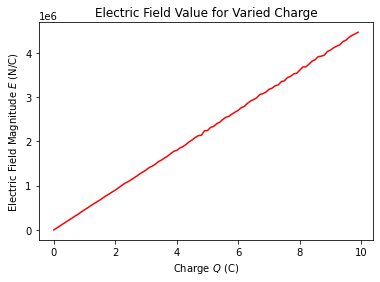

In [59]:
plt.plot(extremeAnalysis[0][5], extremeAnalysis[0][0], "RED")
plt.title("Electric Field Value for Varied Charge")
plt.ylabel("Electric Field Magnitude $E$ (N/C)")
plt.xlabel("Charge $Q$ (C)")

From the above plot, as we would expect, the electric field magnitude at the given point increases linearly with increased charge.

Text(0.5, 0, 'Charge $Q$ (C)')

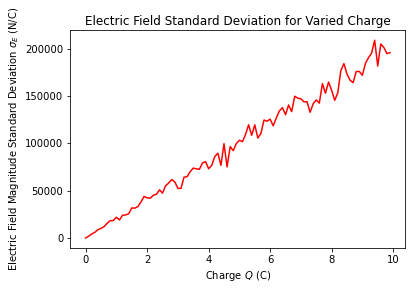

In [60]:
plt.plot(extremeAnalysis[0][5], extremeAnalysis[0][2], "RED")
plt.title("Electric Field Standard Deviation for Varied Charge")
plt.ylabel("Electric Field Magnitude Standard Deviation $σ_{E}$ (N/C)")
plt.xlabel("Charge $Q$ (C)")

From the above plot, also as we would expect, the electric field magnitude standard deviation $\sigma_{E}$ increases linearly with increased charge $Q$ and, thus, increased electric field magnitude $E$. We would expect the ratio of electric field magnitude standard deviation $\sigma_{E}$ to electric field magnitude $E$ to be constant. We will test this in the following cell.

σ_E to E ratio standard deviation = 0.0028606275708991775


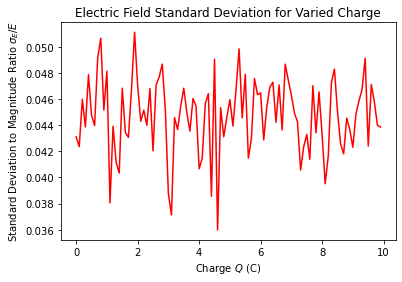

In [61]:
plt.plot(extremeAnalysis[0][5], extremeAnalysis[0][2]/extremeAnalysis[0][0], "RED")
plt.title("Electric Field Standard Deviation for Varied Charge")
plt.ylabel("Standard Deviation to Magnitude Ratio $σ_{E}/E$")
plt.xlabel("Charge $Q$ (C)")

print("σ_E to E ratio standard deviation = " + str(np.std(extremeAnalysis[0][2]/extremeAnalysis[0][0])))

As we can see from the above plot and the calculation of the standard deviation of the $\sigma_{E}$ to $E$ ratio, the standard deviation of the electric field magnitude $\sigma_{E}$ increases proportionally to the electric field magnitude $E$.

From this data, it appears that no tested value of $Q$ will result in extreme conditions and, thus, any tested value of $Q$ may be used. (Note that we are only worried about assessing positive values of $Q$ as our analysis results will not differ for negative values.)

#### Varied Distance

Note that, for precision, the calculation of the electric field data for varied distance $r$ was done with a far greater number of charges $n$.

In the following calculation, the varied input was applied to each component of the position. Therefore, **the distance is not equal to the values contained in 'testrange.'** The following calculation gives us the correct distance:

$r = \left( \sum\limits_{i=0}^{N} r_{i}^{2} \right) ^{\frac{1}{2}}$

Where $r_{i}$ is equal to the $i$th input component of $r$.

For two dimensions ($N = 2$), the calculation becomes:

$r = \sqrt{r_{0}^{2} + r_{1}^{2}}$

Where $r_{0}$ and $r_{1}$ are the $X$ and $Y$ components of $r$, respectively.

As we are inputting the same values for each component, the calculation becomes:

$r = \sqrt{r_{0}^{2} + r_{0}^{2}}\\
\;= \sqrt{2r_{0}^2}\\
\;= \sqrt{2}r_{0}$

Where $r_{0}$ is the value input for each component of $r$.

For future reference, we know that the calculation in three dimensions ($N = 3$) will be:
$r = \sqrt{3}r_{0}$

In the following analyses, we can now apply this calculation to the array of inputs so that we may plot the distance in terms of **magnitude** instead of components.

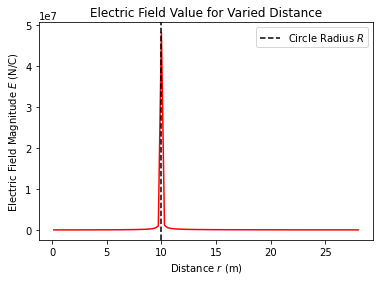

In [97]:
testrange = np.sqrt(2)*extremeAnalysis[1][5]

plt.plot(testrange, extremeAnalysis[1][0], "RED")
plt.axvline(x=10, color="k", linestyle="--", label="Circle Radius $R$")
plt.title("Electric Field Value for Varied Distance")
plt.ylabel("Electric Field Magnitude $E$ (N/C)")
plt.xlabel("Distance $r$ (m)")
plt.legend()

As we can see from the above plot, there is extreme behavior for $r \approx R$. Due to this, we will be sure to select values of $r$ that are very different for the value of $R$ that we select for our analyses.

In order to account for this, we must determine what value of $r_{0}$ produces this behavior by rearranging our earlier calculation:

$\;\;\;\;r = \sqrt{2}r_{0}\\
\frac{1}{\sqrt{2}}r = r_{0}\\
\;\;\;r_{0} = \frac{1}{\sqrt{2}}r$

Since we are avoiding $r \approx R$, the calculation becomes:

$\;\;r_{0} \approx \frac{1}{\sqrt{2}}R$

$_{this}$ $_{equation}$ $_{was}$ $_{made}$ $_{by}$ $_{irrational}$ $_{gang}$

To ensure that there is no other extreme behavior that must be avoided, we will now analyze the standard deviation of the electric field magnitude $\sigma_E$ for varying distance $r$.

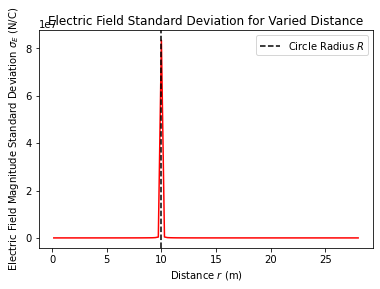

In [98]:
plt.plot(testrange, extremeAnalysis[1][2], "RED")
plt.axvline(x=10, color="k", linestyle="--", label="Circle Radius $R$")
plt.title("Electric Field Standard Deviation for Varied Distance")
plt.ylabel("Electric Field Magnitude Standard Deviation $\sigma_E$ (N/C)")
plt.xlabel("Distance $r$ (m)")
plt.legend()

From the above plot, there does not seem to be any other extreme behavior for varying distance $r$.

We will now test the proportionality of the standard deviation of the electric field magnitude $\sigma_E$ to the electric field magnitude $E$:

σ_E to E ratio standard deviation = 0.19918047150890253


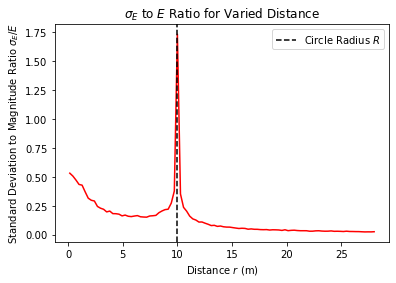

In [99]:
plt.plot(testrange, extremeAnalysis[1][2]/extremeAnalysis[1][0], "RED")
plt.axvline(x=10, color="k", linestyle="--", label="Circle Radius $R$")
plt.title("$\sigma_E$ to $E$ Ratio for Varied Distance")
plt.ylabel("Standard Deviation to Magnitude Ratio $σ_{E}/E$")
plt.xlabel("Distance $r$ (m)")
plt.legend()

print("σ_E to E ratio standard deviation = " + str(np.std(extremeAnalysis[1][2]/extremeAnalysis[1][0])))

As we can see, there does appear to be a significant disproportionality between the standard deviation of the electric field magnitude $\sigma_E$ and the electric field magnitude $E$. This is likely due to the chaotic behavior of electric fields for very small distances. As $r \to R$, the point $P$ becomes extremely close to some point charges. In the following cell, we will do a small test on this hypothesis by plotting this again for a lesser number of charges $n$.

Also notable is the behavior of the $\sigma_E$ to $E$ ratio for $r < R$. The standard deviation of the electric field magnitude $\sigma_E$ appears to be disproportionately large for distances $r$ that are less than the radius of the circle $R$, more so closer to the center ($r \approx 0$). For this reason, we will be avoiding analyses for $r < R$ in addition to $r \approx R$.

σ_E to E ratio standard deviation = 1.3043215610757013


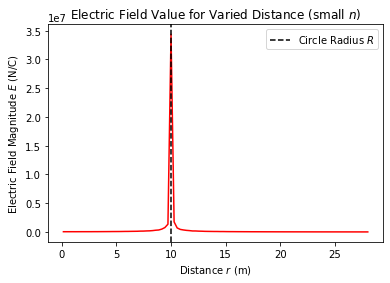

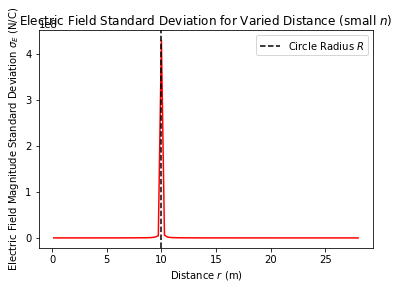

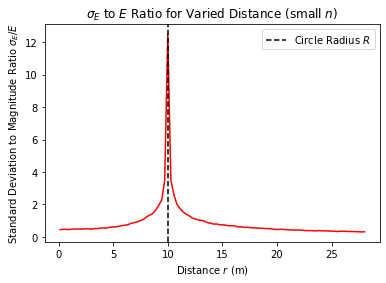

In [94]:
testrange_rsmalln = np.sqrt(2)*extremeAnalysis_rsmalln[5]

fig, axe = plt.subplots()
axe.plot(testrange_rsmalln, extremeAnalysis_rsmalln[0], "RED")
plt.axvline(x=10, color="k", linestyle="--", label="Circle Radius $R$")
plt.title("Electric Field Value for Varied Distance (small $n$)")
plt.ylabel("Electric Field Magnitude $E$ (N/C)")
plt.xlabel("Distance $r$ (m)")
plt.legend()

fig, axe = plt.subplots()
axe.plot(testrange_rsmalln, extremeAnalysis_rsmalln[2], "RED")
plt.axvline(x=10, color="k", linestyle="--", label="Circle Radius $R$")
plt.title("Electric Field Standard Deviation for Varied Distance (small $n$)")
plt.ylabel("Electric Field Magnitude Standard Deviation $\sigma_E$ (N/C)")
plt.xlabel("Distance $r$ (m)")
plt.legend()

fig, axe = plt.subplots()
axe.plot(testrange_rsmalln, extremeAnalysis_rsmalln[2]/extremeAnalysis_rsmalln[0], "RED")
plt.axvline(x=10, color="k", linestyle="--", label="Circle Radius $R$")
plt.title("$\sigma_E$ to $E$ Ratio for Varied Distance (small $n$)")
plt.ylabel("Standard Deviation to Magnitude Ratio $σ_{E}/E$")
plt.xlabel("Distance $r$ (m)")
plt.legend()

print("σ_E to E ratio standard deviation = " + str(np.std(extremeAnalysis_rsmalln[2]/extremeAnalysis_rsmalln[0])))



Strangely, the erratic behavior for $r < R$ appears to disappear for small $n$.

### Behavior for small n (number of charges)

For small n, we would expect to see average electric field magnitudes and directions that match our theoretical predictions. However, we should observe a high standard deviation.

As we can see from the above outputs, we do observe accurate electric field magnitude and direction calculations. However, the measured standard deviation of the calculations is

## Testing Cells

All of the following cells were used to test the functions that I created in order to ensure the correctness of the calculations, optimize functionality, and help me figure out the optimal data analysis and presentation methods.

As these cells were used solely to aid in development, they are uncommented and the data acquired is not presentable.

In [28]:
E, Ecomps, r̂ = calcE([1000, 2000, 1000], 50, 5, [5, 5, 5], 20)

print(E)
print(Ecomps[0])
print(Ecomps[1])
print(Ecomps[2])
print(r̂)

74544.45906202217
30574.600125263645
60761.56708817741
30497.576445000388
[0.41015255 0.81510508 0.40911929]


In [10]:
totalE = 0
totalr̂ = np.zeros(3)
θs = []
Es = []
r̂θs = []

for i in range(100000):
    E, Ecomps, r̂ = calcE([1000, 2000, 1000], 50, 5, [5, 5, 5], 20)
    totalE = totalE + E
    totalr̂ = totalr̂ + r̂
    x̂ = np.array([1, 0, 0])
    Es.append(E)
    θs.append(np.degrees(np.arccos(np.dot(r̂, x̂))))
    r̂θs.append(r̂)
    
totalE = totalE/100000
totalr̂ = totalr̂/100000

θs = np.array(θs)

r̂θs = np.array(r̂θs)

for i in range(len(r̂θs)):
    r̂θs[i] = np.degrees(np.arccos(np.dot(r̂θs[i], totalr̂)))

print("E:\t\t\t\t\t" + str(totalE) + " N/C")
expectedE = 8.988E9*50/(np.sqrt(995**2 + 1995**2 + 995**2))**2
print("Expected E:\t\t\t\t" + str(expectedE) + " N/C")
print("E standard deviation:\t\t\t" + str(np.std(np.array(Es))) + " N/C")
print("E error:\t\t\t\t" + str(np.absolute(((totalE - expectedE)/expectedE))*100) + " %")
print()
print("r̂:\t\t\t\t\t" + str(totalr̂))
expectedr̂ = np.array([995, 1995, 995])/np.linalg.norm(np.array([995, 1995, 995]))
print("Expected r̂:\t\t\t\t" + str(expectedr̂))
print()
print("Mean angle from x̂:\t\t\t" + str(np.mean(θs)) + " " + u'\u00B0')
print("Expected angle from x̂:\t\t\t" + str(np.degrees(np.arccos(np.dot(expectedr̂, x̂)))) + " " + u'\u00B0')
print("Angle from x̂ standard deviation:\t" + str(np.std(θs)) + " " + u'\u00B0')
print("Angle from r̂ standard deviation:\t" + str(np.std(r̂θs)) + " " + u'\u00B0')
print("Angle from x̂ error:\t\t\t" + str(np.absolute((((np.mean(θs)) - np.degrees(np.arccos(np.dot(expectedr̂, x̂))))/np.degrees(np.arccos(np.dot(expectedr̂, x̂)))))*100) + " %")

E:					75399.53914641157 N/C
Expected E:				75401.73571641296 N/C
E standard deviation:			299.1881591394903 N/C
E error:				0.0029131557523534753 %

r̂:					[0.40756453 0.81718096 0.40754993]
Expected r̂:				[0.40756532 0.8171787  0.40756532]

Mean angle from x̂:			65.94802128166545 °
Expected angle from x̂:			65.94801674750832 °
Angle from x̂ standard deviation:	0.10711998680022743 °
Angle from r̂ standard deviation:	0.05373552926953771 °
Angle from x̂ error:			6.875350240383218e-06 %


In [11]:
aveE, aver̂, Es, x̂θs, r̂θs = tester(100000, [1000, 2000, 1000], 50, 5, [5, 5, 5], 20)

x̂ = np.array([1, 0, 0])

print("E:\t\t\t\t\t" + str(aveE) + " N/C")
expectedE = 8.988E9*50/(np.sqrt(995**2 + 1995**2 + 995**2))**2
print("Expected E:\t\t\t\t" + str(expectedE) + " N/C")
print("E standard deviation:\t\t\t" + str(np.std(np.array(Es))) + " N/C")
print("E error:\t\t\t\t" + str(np.absolute(((aveE - expectedE)/expectedE))*100) + " %")
print()
print("r̂:\t\t\t\t\t" + str(aver̂))
expectedr̂ = np.array([995, 1995, 995])/np.linalg.norm(np.array([995, 1995, 995]))
print("Expected r̂:\t\t\t\t" + str(expectedr̂))
print()
print("Mean angle from x̂:\t\t\t" + str(np.mean(x̂θs)) + " " + u'\u00B0')
print("Expected angle from x̂:\t\t\t" + str(np.degrees(np.arccos(np.dot(expectedr̂, x̂)))) + " " + u'\u00B0')
print("Angle from x̂ standard deviation:\t" + str(np.std(x̂θs)) + " " + u'\u00B0')
print("Angle from r̂ standard deviation:\t" + str(np.std(r̂θs)) + " " + u'\u00B0')
print("Angle from x̂ error:\t\t\t" + str(np.absolute((((np.mean(x̂θs)) - np.degrees(np.arccos(np.dot(expectedr̂, x̂))))/np.degrees(np.arccos(np.dot(expectedr̂, x̂)))))*100) + " %")

E:					75401.23462343772 N/C
Expected E:				75401.73571641296 N/C
E standard deviation:			298.1084006757366 N/C
E error:				0.0006645642444237039 %

r̂:					[0.40757198 0.81717471 0.407555  ]
Expected r̂:				[0.40756532 0.8171787  0.40756532]

Mean angle from x̂:			65.94755435615232 °
Expected angle from x̂:			65.94801674750832 °
Angle from x̂ standard deviation:	0.1068279435237896 °
Angle from r̂ standard deviation:	0.05370850758462054 °
Angle from x̂ error:			0.0007011452031464177 %


In [12]:
testandsummarize(100000, [1000, 2000, 1000], 50, 5, [5, 5, 5], 20)

E:					75400.96198501576 N/C
Expected E:				75401.73571641296 N/C
E standard deviation:			299.5687359402174 N/C
E error:				0.0010261453398273908 %

r̂:					[0.40755652 0.81718792 0.40754395]
Expected r̂:				[0.40756532 0.8171787  0.40756532]

Mean angle from x̂:			65.94852423780198 °
Expected angle from x̂:			65.94801674750832 °
Angle from x̂ standard deviation:	0.10667066876581971 °
Angle from r̂ standard deviation:	0.05397421447907267 °
Angle from x̂ error:			0.0007695307890759531 %


In [13]:
totalE = 0
totalr̂ = np.zeros(3)
θs = []
Es = []
r̂θs = []

for i in range(100000):
    E, Ecomps, r̂ = calcE([1000, 1000, 1000], 50, 5, [5, 5, 5], 20)
    totalE = totalE + E
    totalr̂ = totalr̂ + r̂
    x̂ = np.array([1, 0, 0])
    Es.append(E)
    θs.append(np.degrees(np.arccos(np.dot(r̂, x̂))))
    r̂θs.append(r̂)
    
totalE = totalE/100000
totalr̂ = totalr̂/100000

θs = np.array(θs)

r̂θs = np.array(r̂θs)

for i in range(len(r̂θs)):
    r̂θs[i] = np.degrees(np.arccos(np.dot(r̂θs[i], totalr̂)))

print("E:\t\t\t\t\t" + str(totalE) + " N/C")
expectedE = 8.988E9*50/(np.sqrt(995**2 + 995**2 + 995**2))**2
print("Expected E:\t\t\t\t" + str(expectedE) + " N/C")
print("E standard deviation:\t\t\t" + str(np.std(np.array(Es))) + " N/C")
print("E error:\t\t\t\t" + str(np.absolute(((totalE - expectedE)/expectedE))*100) + " %")
print()
print("r̂:\t\t\t\t\t" + str(totalr̂))
expectedr̂ = np.array([995, 995, 995])/np.linalg.norm(np.array([995, 995, 995]))
print("Expected r̂:\t\t\t\t" + str(expectedr̂))
print()
print("Mean angle from x̂:\t\t\t" + str(np.mean(θs)) + " " + u'\u00B0')
print("Expected angle from x̂:\t\t\t" + str(np.degrees(np.arccos(np.dot(expectedr̂, x̂)))) + " " + u'\u00B0')
print("Angle from x̂ standard deviation:\t" + str(np.std(θs)) + " " + u'\u00B0')
print("Angle from r̂ standard deviation:\t" + str(np.std(r̂θs)) + " " + u'\u00B0')
print("Angle from x̂ error:\t\t\t" + str(np.absolute((((np.mean(θs)) - np.degrees(np.arccos(np.dot(expectedr̂, x̂))))/np.degrees(np.arccos(np.dot(expectedr̂, x̂)))))*100) + " %")

E:					151307.16306814007 N/C
Expected E:				151309.3103709502 N/C
E standard deviation:			905.7846593765961 N/C
E error:				0.0014191478401874103 %

r̂:					[0.57736639 0.57734833 0.5773205 ]
Expected r̂:				[0.57735027 0.57735027 0.57735027]

Mean angle from x̂:			54.73431943137469 °
Expected angle from x̂:			54.735610317245346 °
Angle from x̂ standard deviation:	0.1608797488613085 °
Angle from r̂ standard deviation:	0.0735946095387176 °
Angle from x̂ error:			0.002358402259827709 %


In [14]:
aveE, aver̂, Es, x̂θs, r̂θs = tester(100000, [1000, 1000, 1000], 50, 5, [5, 5, 5], 20)

x̂ = np.array([1, 0, 0])

print("E:\t\t\t\t\t" + str(aveE) + " N/C")
expectedE = 8.988E9*50/(np.sqrt(995**2 + 995**2 + 995**2))**2
print("Expected E:\t\t\t\t" + str(expectedE) + " N/C")
print("E standard deviation:\t\t\t" + str(np.std(np.array(Es))) + " N/C")
print("E error:\t\t\t\t" + str(np.absolute(((aveE - expectedE)/expectedE))*100) + " %")
print()
print("r̂:\t\t\t\t\t" + str(aver̂))
expectedr̂ = np.array([995, 995, 995])/np.linalg.norm(np.array([995, 995, 995]))
print("Expected r̂:\t\t\t\t" + str(expectedr̂))
print()
print("Mean angle from x̂:\t\t\t" + str(np.mean(x̂θs)) + " " + u'\u00B0')
print("Expected angle from x̂:\t\t\t" + str(np.degrees(np.arccos(np.dot(expectedr̂, x̂)))) + " " + u'\u00B0')
print("Angle from x̂ standard deviation:\t" + str(np.std(x̂θs)) + " " + u'\u00B0')
print("Angle from r̂ standard deviation:\t" + str(np.std(r̂θs)) + " " + u'\u00B0')
print("Angle from x̂ error:\t\t\t" + str(np.absolute((((np.mean(x̂θs)) - np.degrees(np.arccos(np.dot(expectedr̂, x̂))))/np.degrees(np.arccos(np.dot(expectedr̂, x̂)))))*100) + " %")

E:					151310.64974678212 N/C
Expected E:				151309.3103709502 N/C
E standard deviation:			903.7716138080804 N/C
E error:				0.0008851906261622307 %

r̂:					[0.57736454 0.57736484 0.5773059 ]
Expected r̂:				[0.57735027 0.57735027 0.57735027]

Mean angle from x̂:			54.734450092181135 °
Expected angle from x̂:			54.735610317245346 °
Angle from x̂ standard deviation:	0.16056021555981337 °
Angle from r̂ standard deviation:	0.07346981436942975 °
Angle from x̂ error:			0.002119689645345509 %


In [15]:
testandsummarize(100000, [1000, 1000, 1000], 50, 5, [5, 5, 5], 20)

E:					151312.02122647956 N/C
Expected E:				151309.3103709502 N/C
E standard deviation:			905.3368486188851 N/C
E error:				0.0017915986284694698 %

r̂:					[0.57736145 0.57735589 0.5773179 ]
Expected r̂:				[0.57735027 0.57735027 0.57735027]

Mean angle from x̂:			54.73466660234313 °
Expected angle from x̂:			54.735610317245346 °
Angle from x̂ standard deviation:	0.1606136541466461 °
Angle from r̂ standard deviation:	0.0735024383639527 °
Angle from x̂ error:			0.0017241333324751677 %


In [16]:
testandsummarize(100000, [1000, 1000], 50, 5, [5, 5], 20)

E:					227001.05065459697 N/C
Expected E:				226963.96555642533 N/C
E standard deviation:			2031.9850878332695 N/C
E error:				0.01633964144075376 %

r̂:					[0.70710243 0.70709691]
Expected r̂:				[0.70710678 0.70710678]

Mean angle from x̂:			44.99977635335051 °
Expected angle from x̂:			45.0 °
Angle from x̂ standard deviation:	0.256998366691063 °
Angle from r̂ standard deviation:	0.10080442270648875 °
Angle from x̂ error:			0.0004969925544173748 %


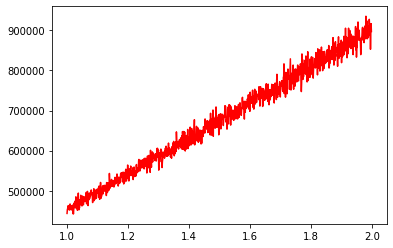

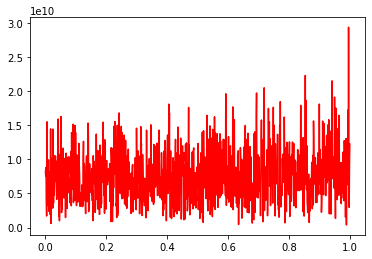

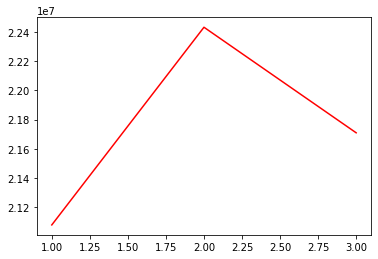

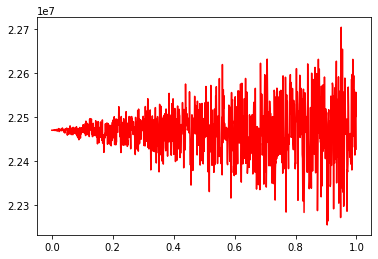

In [17]:
#Very short range tests

Es, r̂s, testrange = varier(1000, "Q", [1, 2], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

Es, r̂s, testrange = varier(1000, "r", [0, 1], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

Es, r̂s, testrange = varier(1000, "n", [1, 4], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

Es, r̂s, testrange = varier(1000, "R", [0, 1], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

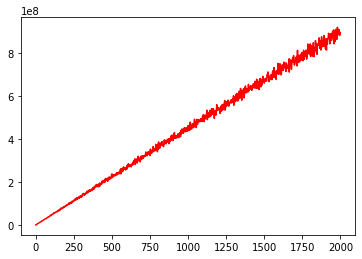

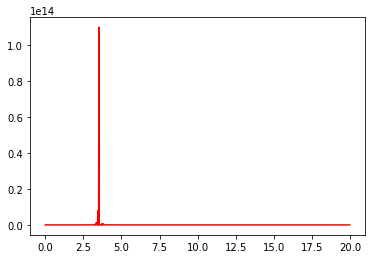

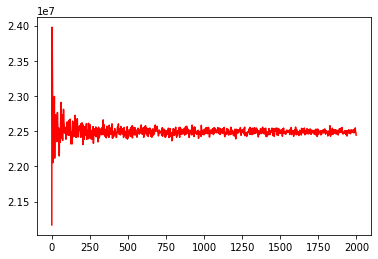

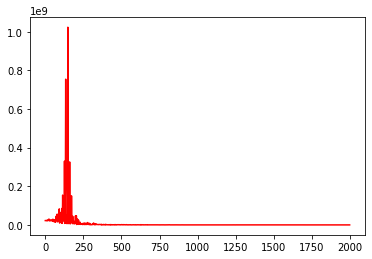

In [18]:
#Longer range tests

Es, r̂s, testrange = varier(1000, "Q", [1, 2000], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

Es, r̂s, testrange = varier(1000, "r", [0, 20], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

Es, r̂s, testrange = varier(1000, "n", [1, 2000], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

Es, r̂s, testrange = varier(1000, "R", [0, 2000], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

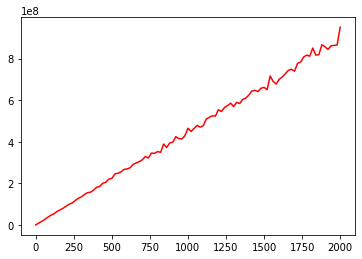

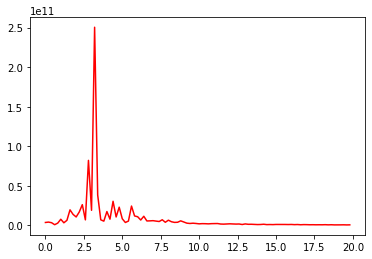

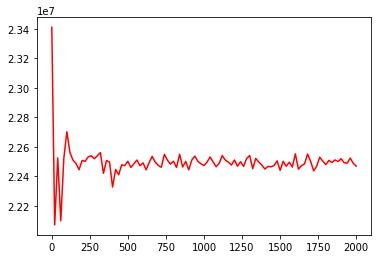

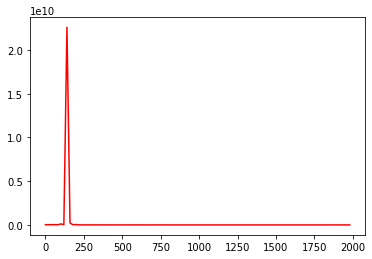

In [19]:
#Tests for comparison between varier and varierAver

Es, r̂s, testrange = varier(100, "Q", [1, 2000], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

Es, r̂s, testrange = varier(100, "r", [0, 20], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

Es, r̂s, testrange = varier(100, "n", [1, 2000], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

Es, r̂s, testrange = varier(100, "R", [0, 2000], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

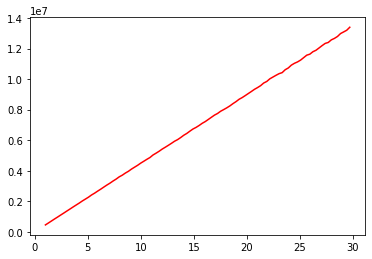

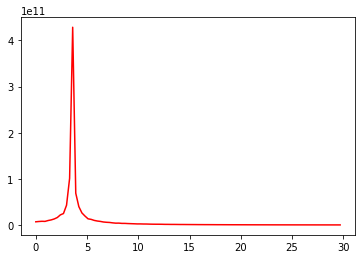

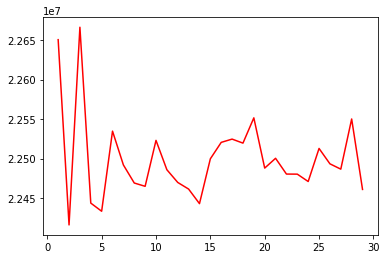

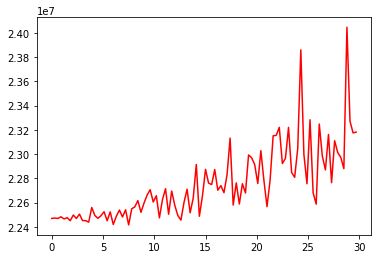

In [20]:
#Tests for comparison between varier and varierAver

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "Q", [1, 30], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "r", [0, 30], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "n", [1, 30], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "R", [0, 30], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

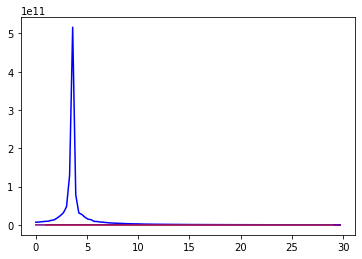

In [21]:
#Tests for comparison between varier and varierAver

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "Q", [1, 30], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

Es2, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "r", [0, 30], [100, 100], 50, 5, 5)

#fig, axe = plt.subplots()
axe.plot(testrange, Es2, "BLUE")

Es3, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "n", [1, 30], [100, 100], 50, 5, 5)

#fig, axe = plt.subplots()
axe.plot(testrange, Es3, "ORANGE")

Es4, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "R", [0, 30], [100, 100], 50, 5, 5)

#fig, axe = plt.subplots()
axe.plot(testrange, Es4, "PURPLE")

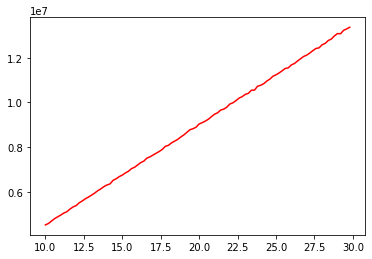

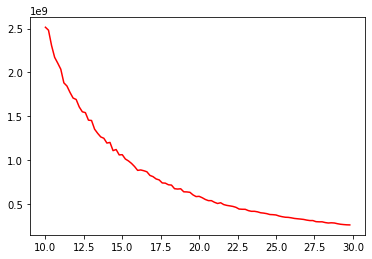

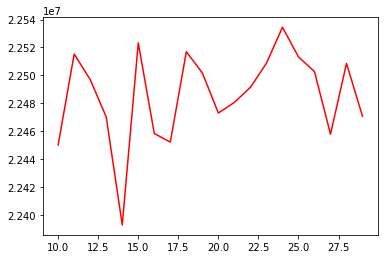

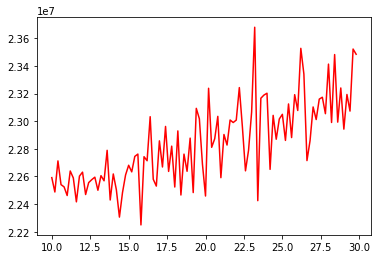

In [22]:
#Tests for comparison between varier and varierAver

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "Q", [10, 30], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "r", [10, 30], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "n", [10, 30], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "R", [10, 30], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")

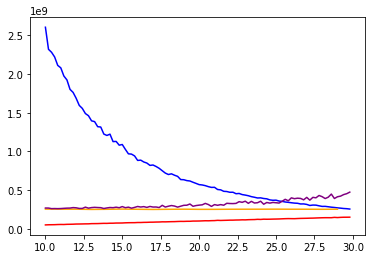

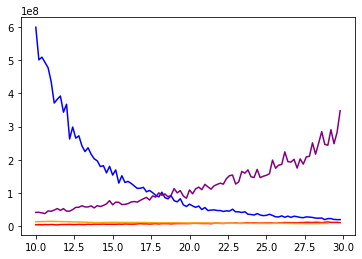

In [29]:
#Tests for comparison between varier and varierAver

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "Q", [10, 30], [30, 30], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Es, "RED")
fig2, axe2 = plt.subplots()
axe2.plot(testrange, Eσs, "RED")

Es2, r̂s, Eσs2, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "r", [10, 30], [30, 30], 50, 5, 5)

#fig, axe = plt.subplots()
axe.plot(testrange, Es2, "BLUE")
axe2.plot(testrange, Eσs2, "BLUE")

Es3, r̂s, Eσs3, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "n", [10, 30], [30, 30], 50, 5, 5)

#fig, axe = plt.subplots()
axe.plot(testrange, Es3, "ORANGE")
axe2.plot(testrange, Eσs3, "ORANGE")

Es4, r̂s, Eσs4, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "R", [10, 30], [30, 30], 50, 5, 5)

#fig, axe = plt.subplots()
axe.plot(testrange, Es4, "PURPLE")
axe2.plot(testrange, Eσs4, "PURPLE")

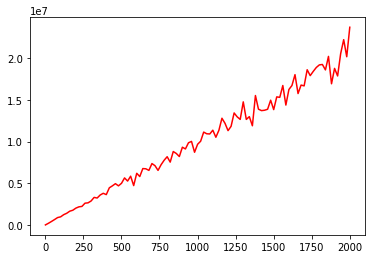

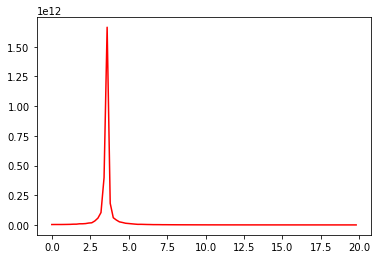

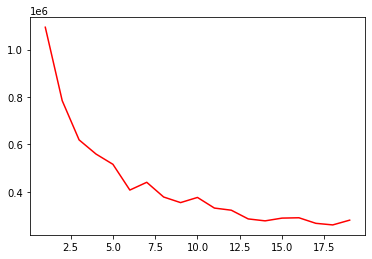

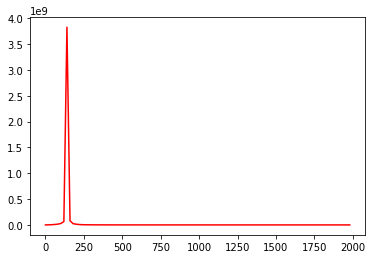

In [24]:
#Standard deviation tests (E)

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "Q", [1, 2000], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Eσs, "RED")

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "r", [0, 20], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Eσs, "RED")

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "n", [1, 20], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Eσs, "RED")

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "R", [0, 2000], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Eσs, "RED")

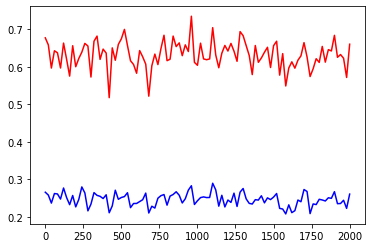

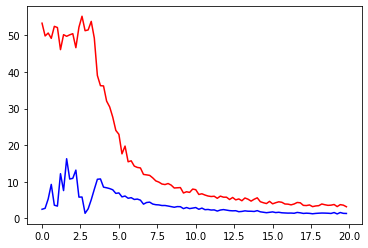

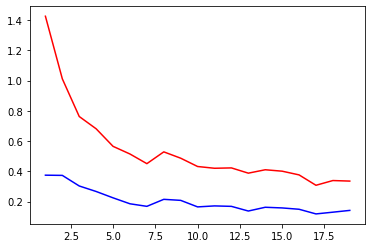

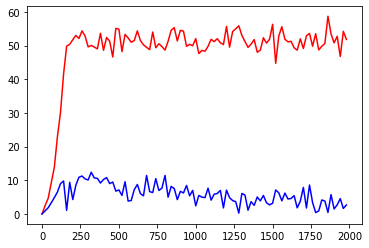

In [25]:
#Standard deviation tests (x̂θ)

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "Q", [1, 2000], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, x̂θσs, "RED")
axe.plot(testrange, r̂θσs, "BLUE")

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "r", [0, 20], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, x̂θσs, "RED")
axe.plot(testrange, r̂θσs, "BLUE")

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "n", [1, 20], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, x̂θσs, "RED")
axe.plot(testrange, r̂θσs, "BLUE")

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "R", [0, 2000], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, x̂θσs, "RED")
axe.plot(testrange, r̂θσs, "BLUE")

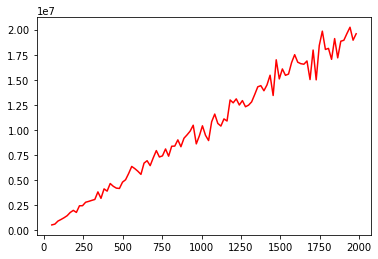

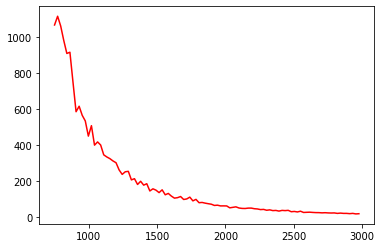

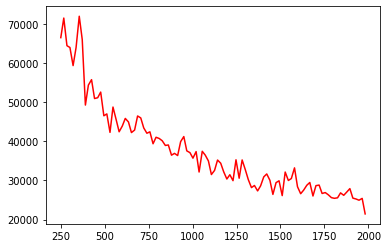

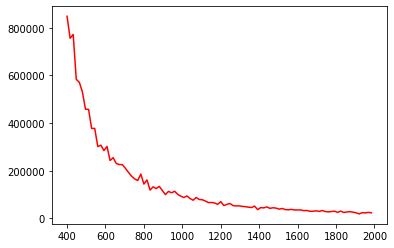

In [26]:
#Standard deviation tests past points of interest (E)

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "Q", [50, 2000], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Eσs, "RED")

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "r", [750, 3000], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Eσs, "RED")

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "n", [250, 2000], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Eσs, "RED")

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "R", [400, 2000], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, Eσs, "RED")

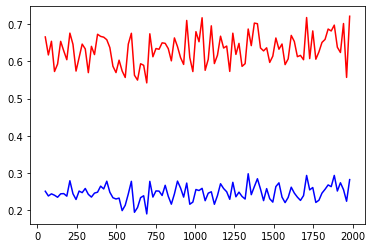

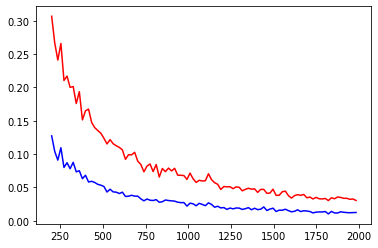

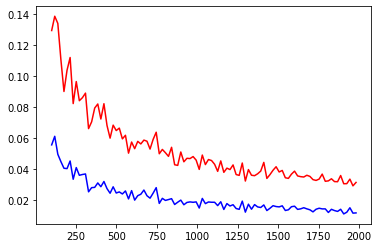

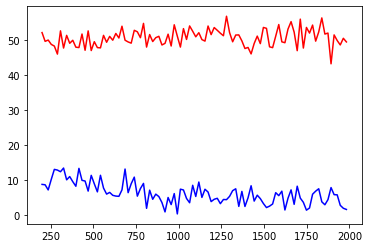

In [27]:
#Standard deviation tests (x̂θ)

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "Q", [50, 2000], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, x̂θσs, "RED")
axe.plot(testrange, r̂θσs, "BLUE")

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "r", [200, 2000], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, x̂θσs, "RED")
axe.plot(testrange, r̂θσs, "BLUE")

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "n", [100, 2000], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, x̂θσs, "RED")
axe.plot(testrange, r̂θσs, "BLUE")

Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "R", [200, 2000], [100, 100], 50, 5, 5)

fig, axe = plt.subplots()
axe.plot(testrange, x̂θσs, "RED")
axe.plot(testrange, r̂θσs, "BLUE")

In [8]:
# Time cells

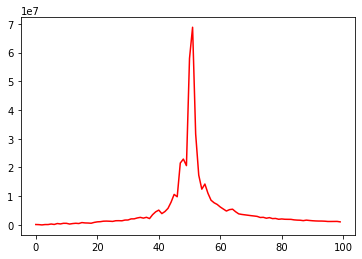

In [55]:
Es = []
for i in range(100):
    Es.append(calcE([i, 0], 1, 500, [0, 0], 50)[0])

fig, axe = plt.subplots()
axe.plot(range(100), Es, "RED")

In [123]:
Eave = np.array([0, 0, 0])

for i in range(10000):
    E, Ecomps, r̂ = calcE([0, 0, 0], 1.0E-9, 100, [0, 0, 0], 1)
    Eave = Eave + E*r̂

Eave = Eave/10000
print(np.linalg.norm(Eave))
print(Eave)
    


E, Ecomps, r̂ = calcE([0, 0, 0], 1.0E-9, 100, [0, 0, 0], 1)

print(E)
print(E*r̂)

0.005014316275889065
[ 0.00092611  0.0005242  -0.00490009]
[ 0.184693    0.10453985 -0.97722051]
1.0318071327848386
[-0.3960716  -0.09638209 -0.94787327]


In [124]:
Eave = np.array([0, 0, 0])

for i in range(10000):
    E, Ecomps, r̂ = calcE([0.5, 0.5, 0.5], 1.0E-9, 100, [0, 0, 0], 1)
    Eave = Eave + E*r̂

Eave = Eave/10000
print(np.linalg.norm(Eave))
print(Eave)
print(Eave/np.linalg.norm(Eave))
    


E, Ecomps, r̂ = calcE([0.5, 0.5, 0.5], 1.0E-9, 100, [0, 0, 0], 1)

print(E)
print(E*r̂)

1.998188586044252
[ 1.13416848  1.17542034 -1.15100239]
[ 0.56759832  0.58824294 -0.5760229 ]
4.724595037120688
[ 1.14358483  3.01995083 -3.4487547 ]


In [129]:
Eave = np.array([0, 0])

for i in range(10000):
    E, Ecomps, r̂ = calcE([0, 0], 1.0E-9, 100, [0, 0], 1)
    Eave = Eave + E*r̂

Eave = Eave/10000
print(np.linalg.norm(Eave))
print(Eave)
print(Eave/np.linalg.norm(Eave))
    


E, Ecomps, r̂ = calcE([0, 0], 1.0E-9, 100, [0, 0], 1)

print(E)
print(E*r̂)

0.007928164691099707
[ 0.00198753 -0.00767499]
[ 0.25069239 -0.9680668 ]
0.3335937712589691
[0.0411856  0.33104162]


In [130]:
Eave = np.array([0, 0])

for i in range(10000):
    E, Ecomps, r̂ = calcE([0.5, 0.5], 1.0E-9, 100, [0, 0], 1)
    Eave = Eave + E*r̂

Eave = Eave/10000
print(np.linalg.norm(Eave))
print(Eave)
print(Eave/np.linalg.norm(Eave))
    


E, Ecomps, r̂ = calcE([0.5, 0.5], 1.0E-9, 100, [0, 0], 1)

print(E)
print(E*r̂)

6.872287689686843
[-4.85270834 -4.8661648 ]
[-0.70612707 -0.70808514]
10.495103786526712
[-7.51321156 -7.3279503 ]
